# Hyper Parameter Optimization For Random Forest

In [1]:
# import libraries
import os
import sys
import numpy as np
import pandas as pd
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
MODEL_NAME = 'RandomForest'

In [2]:
current_path = os.getcwd()
current_path

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/qiujiangwen441/code/Users/qiujiangwen44/Band-gap-predict/SingleModels/RandomForest'

In [3]:
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_path, '../../'))
# Importing the custom module
from Utools.draw import plot_feature_importance, plot_feature_importance
from Utools.SingleModel import SingleModel

In [4]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

## Load Data

In [6]:
# Load data
file_dir = os.path.join(current_path, '../../Data/composition_data/feature_data')
# dft data
dft_train = pd.read_csv(os.path.join(file_dir, 'dft', 'train.csv'))
dft_test = pd.read_csv(os.path.join(file_dir, 'dft', 'test.csv'))
# exp data
exp_train = pd.read_csv(os.path.join(file_dir, 'exp', 'train.csv'))
exp_test = pd.read_csv(os.path.join(file_dir, 'exp', 'test.csv'))

dft_train_X = dft_train.drop(columns=['composition', 'band_gap'])
dft_train_y = dft_train['band_gap']
exp_train_X = exp_train.drop(columns=['composition', 'band_gap'])
exp_train_y = exp_train['band_gap']
dft_test_X = dft_test.drop(columns=['composition', 'band_gap'])
dft_test_y = dft_test['band_gap']
exp_test_X = exp_test.drop(columns=['composition', 'band_gap'])
exp_test_y = exp_test['band_gap']

## Model Train

### DFT Model

In [9]:
# using grid search to find the best hyperparameters for the dft model
print(f"['DFT {MODEL_NAME}'] HP optimazation begin...")
# define the parameter grid for model
param_distributions = {
    # general speaking, more n_estimators better performance, more overfitt, in order to speed up the optimization, we choose small n_estimators
    'n_estimators': [100, 200],  # number of trees in the forest 
    'max_depth': [None, 5, 10],  # maximum depth of the tree, None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 6, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.25, 0.5]  # number of features to consider when looking for the best split, None means all features
}

# create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
# create an model
random_forest = RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1)
# create a GridSearchCV object (n_iter=5, runtime=5min)
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_distributions,
                n_iter=50, cv=kf, verbose=2, random_state=RANDOM_SEED, 
                scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

# fit the model to the training data
random_search.fit(dft_train_X, dft_train_y)

['DFT RandomForest'] HP optimazation begin...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  37.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  19.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  46.4s
[CV] END max_depth=10, max_features=0.25, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  30.2s
[CV] END max_depth=5, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=  44.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.6s
[CV] END max_depth=10, max_features=0.5, min_sampl

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2', 0.25,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.9min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   7.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   9.3s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time= 2.1min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  29.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  16.5s
[CV] END max_depth=10, max_features=0.25,

In [10]:
# get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_score = np.sqrt(-random_search.best_score_)
print(f"Best Cross-Validation RMSE: {best_score:.4f}")

# create a DataFrame to store the results
results = pd.DataFrame(random_search.cv_results_)
results['test_rmse'] = np.sqrt(-results['mean_test_score'])
results['train_rmse'] = np.sqrt(-results['mean_train_score'])
# sort the results by test RMSE
results_sorted = results.sort_values('test_rmse')
results_sorted = results_sorted[['rank_test_score', 'param_n_estimators', 'param_max_depth', 
                                 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'train_rmse', 'test_rmse']]
# save the results to a csv file
results_sorted.to_csv(os.path.join(current_path, 'dft_random_search_results.csv'), index=False)
results_sorted.head()

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Best Cross-Validation RMSE: 0.7228


rank_test_score  param_n_estimators param_max_depth  \
31                1                 200            None   
28                2                 200            None   
14                3                 200            None   
13                4                 200            None   
19                5                 100            None   

    param_min_samples_split  param_min_samples_leaf param_max_features  \
31                        2                       1                0.5   
28                        6                       2               0.25   
14                        2                       4                0.5   
13                        6                       2               sqrt   
19                        2                       4                0.5   

    train_rmse  test_rmse  
31    0.315769   0.722843  
28    0.401404   0.726409  
14    0.457440   0.735701  
13    0.432342   0.737417  
19    0.459143   0.737826

### Overfitting check

####################################################################################################
[DFT - RandomForest] Training RandomForest on DFT data:
----------------------------------------------------------------------------------------------------
Starting model training...
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=  24.3s
Model training completed!
[Train_error] Evaluating DFT RandomForest on DFT train set:


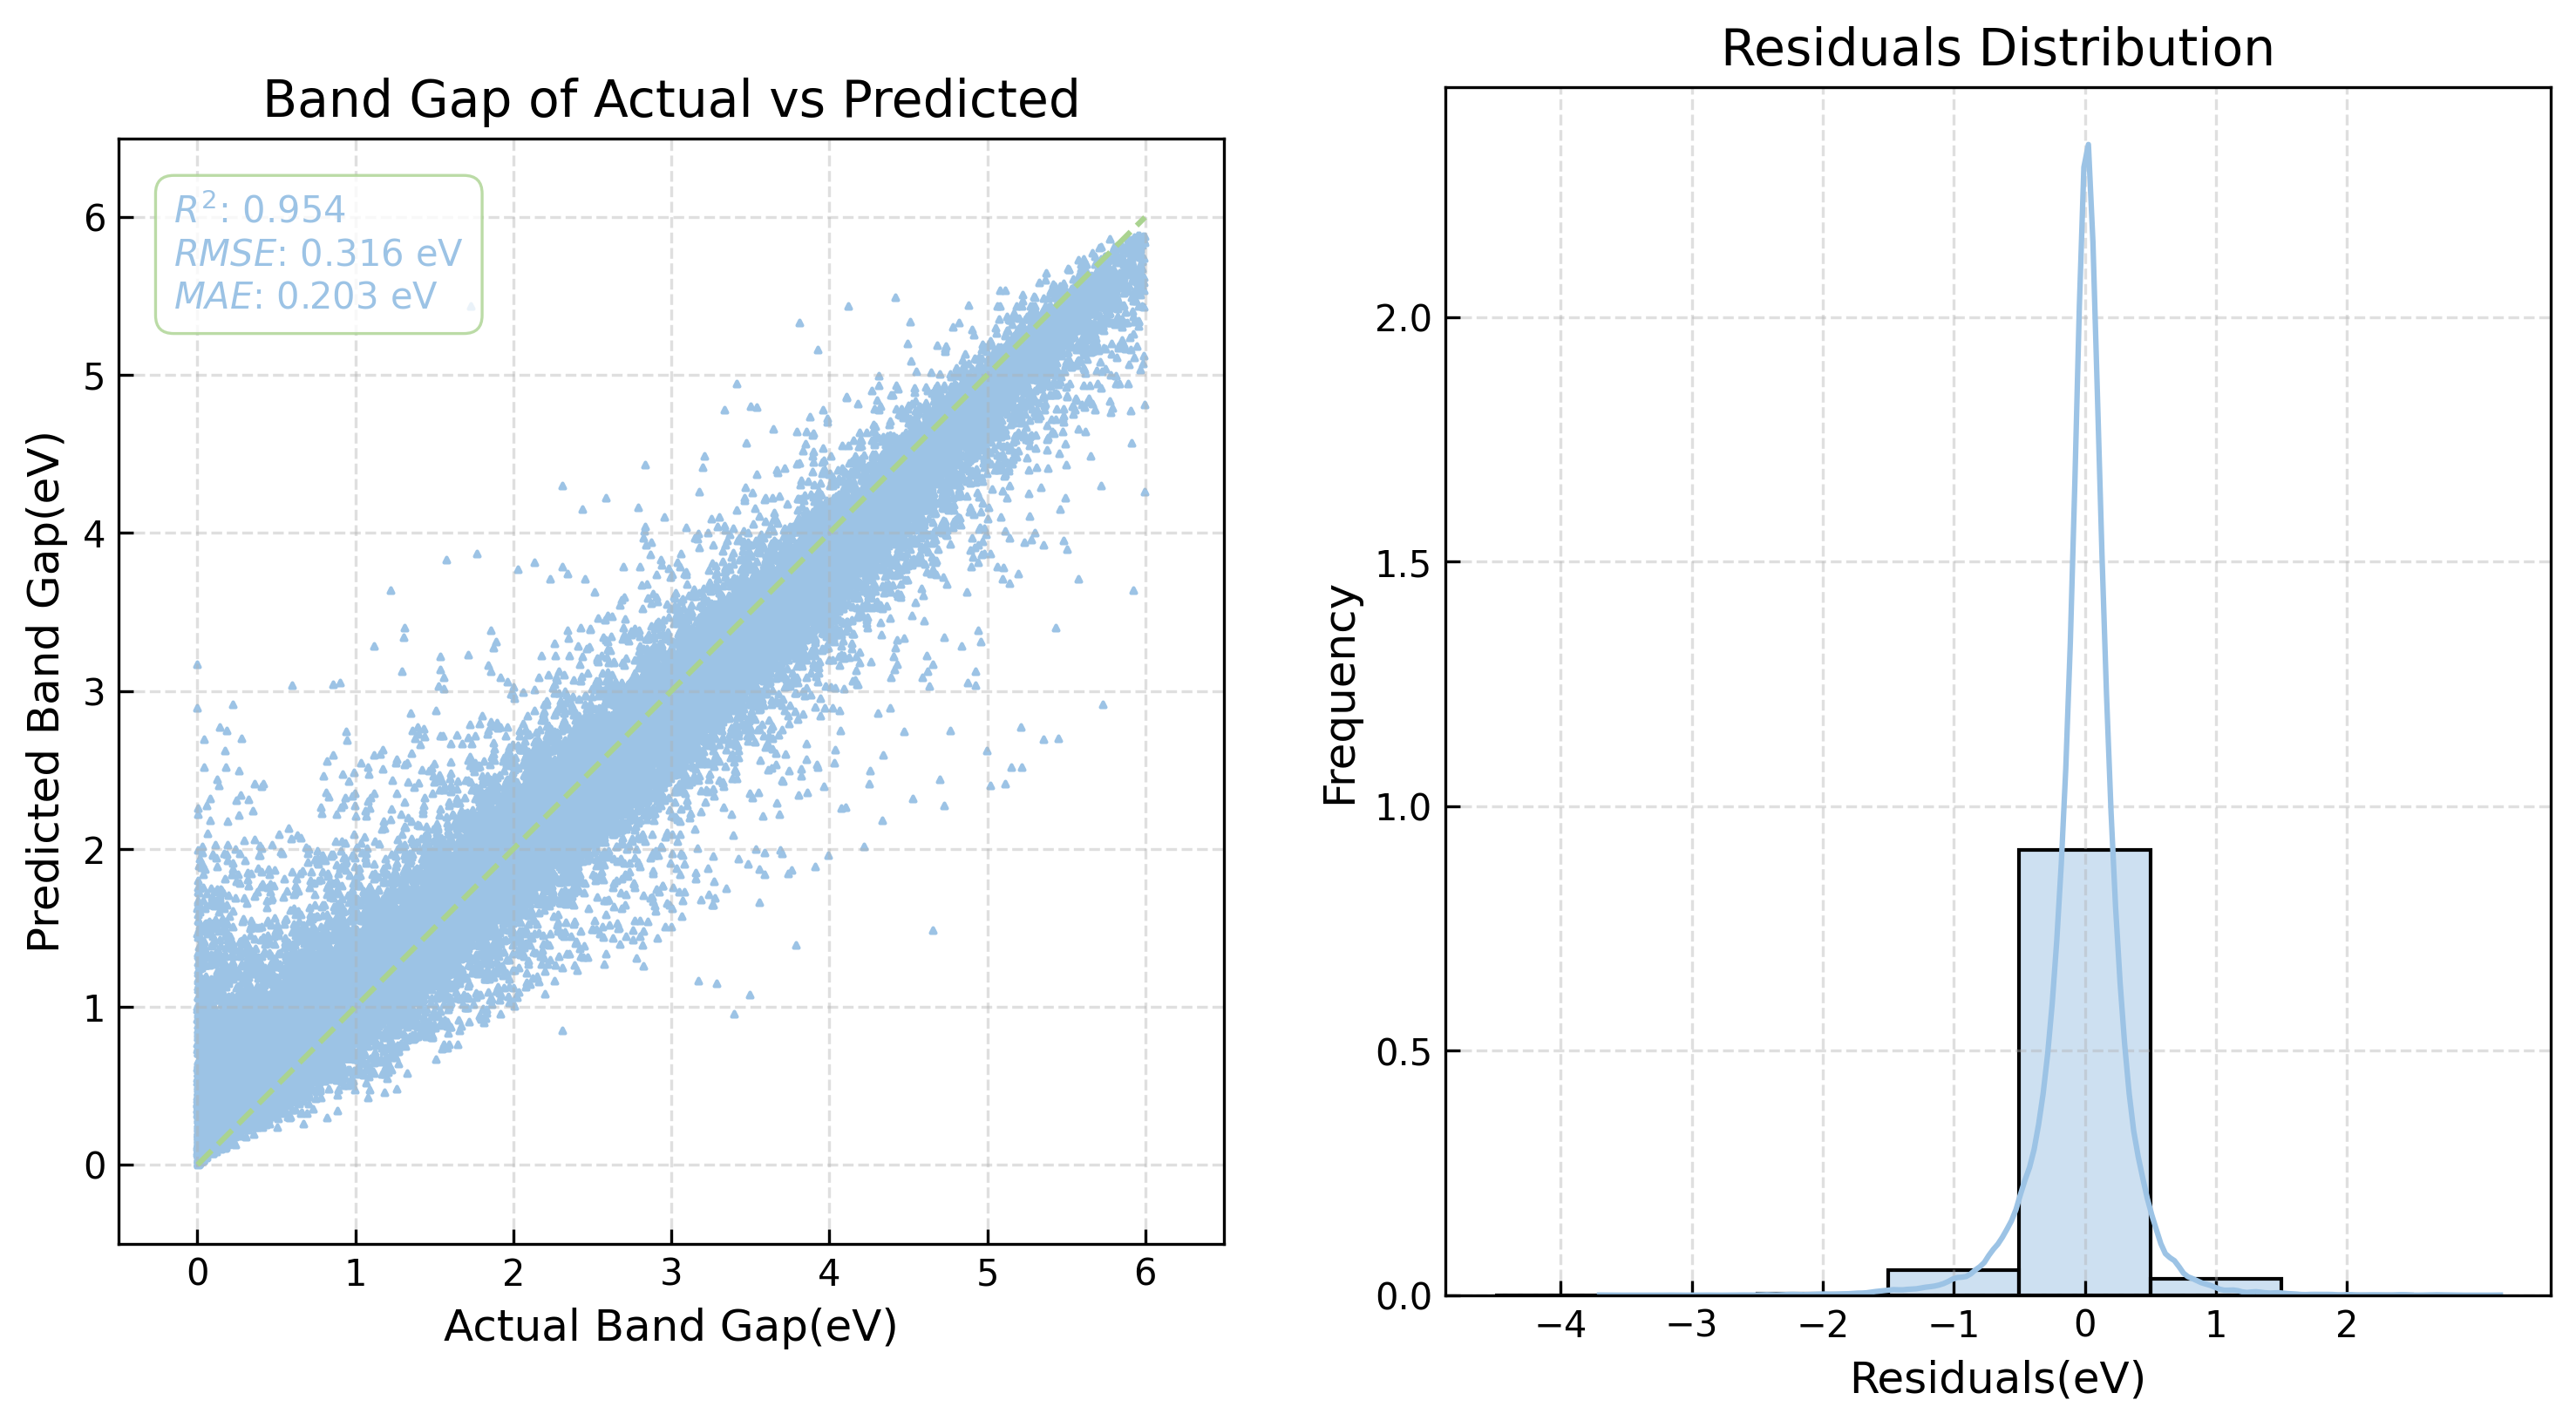


Model Evaluation Results:
Test set: R²: 0.9542 RMSE: 0.3159 MAE: 0.2029
[Test DFT -> DFT] Evaluating DFT RandomForest on DFT test set:


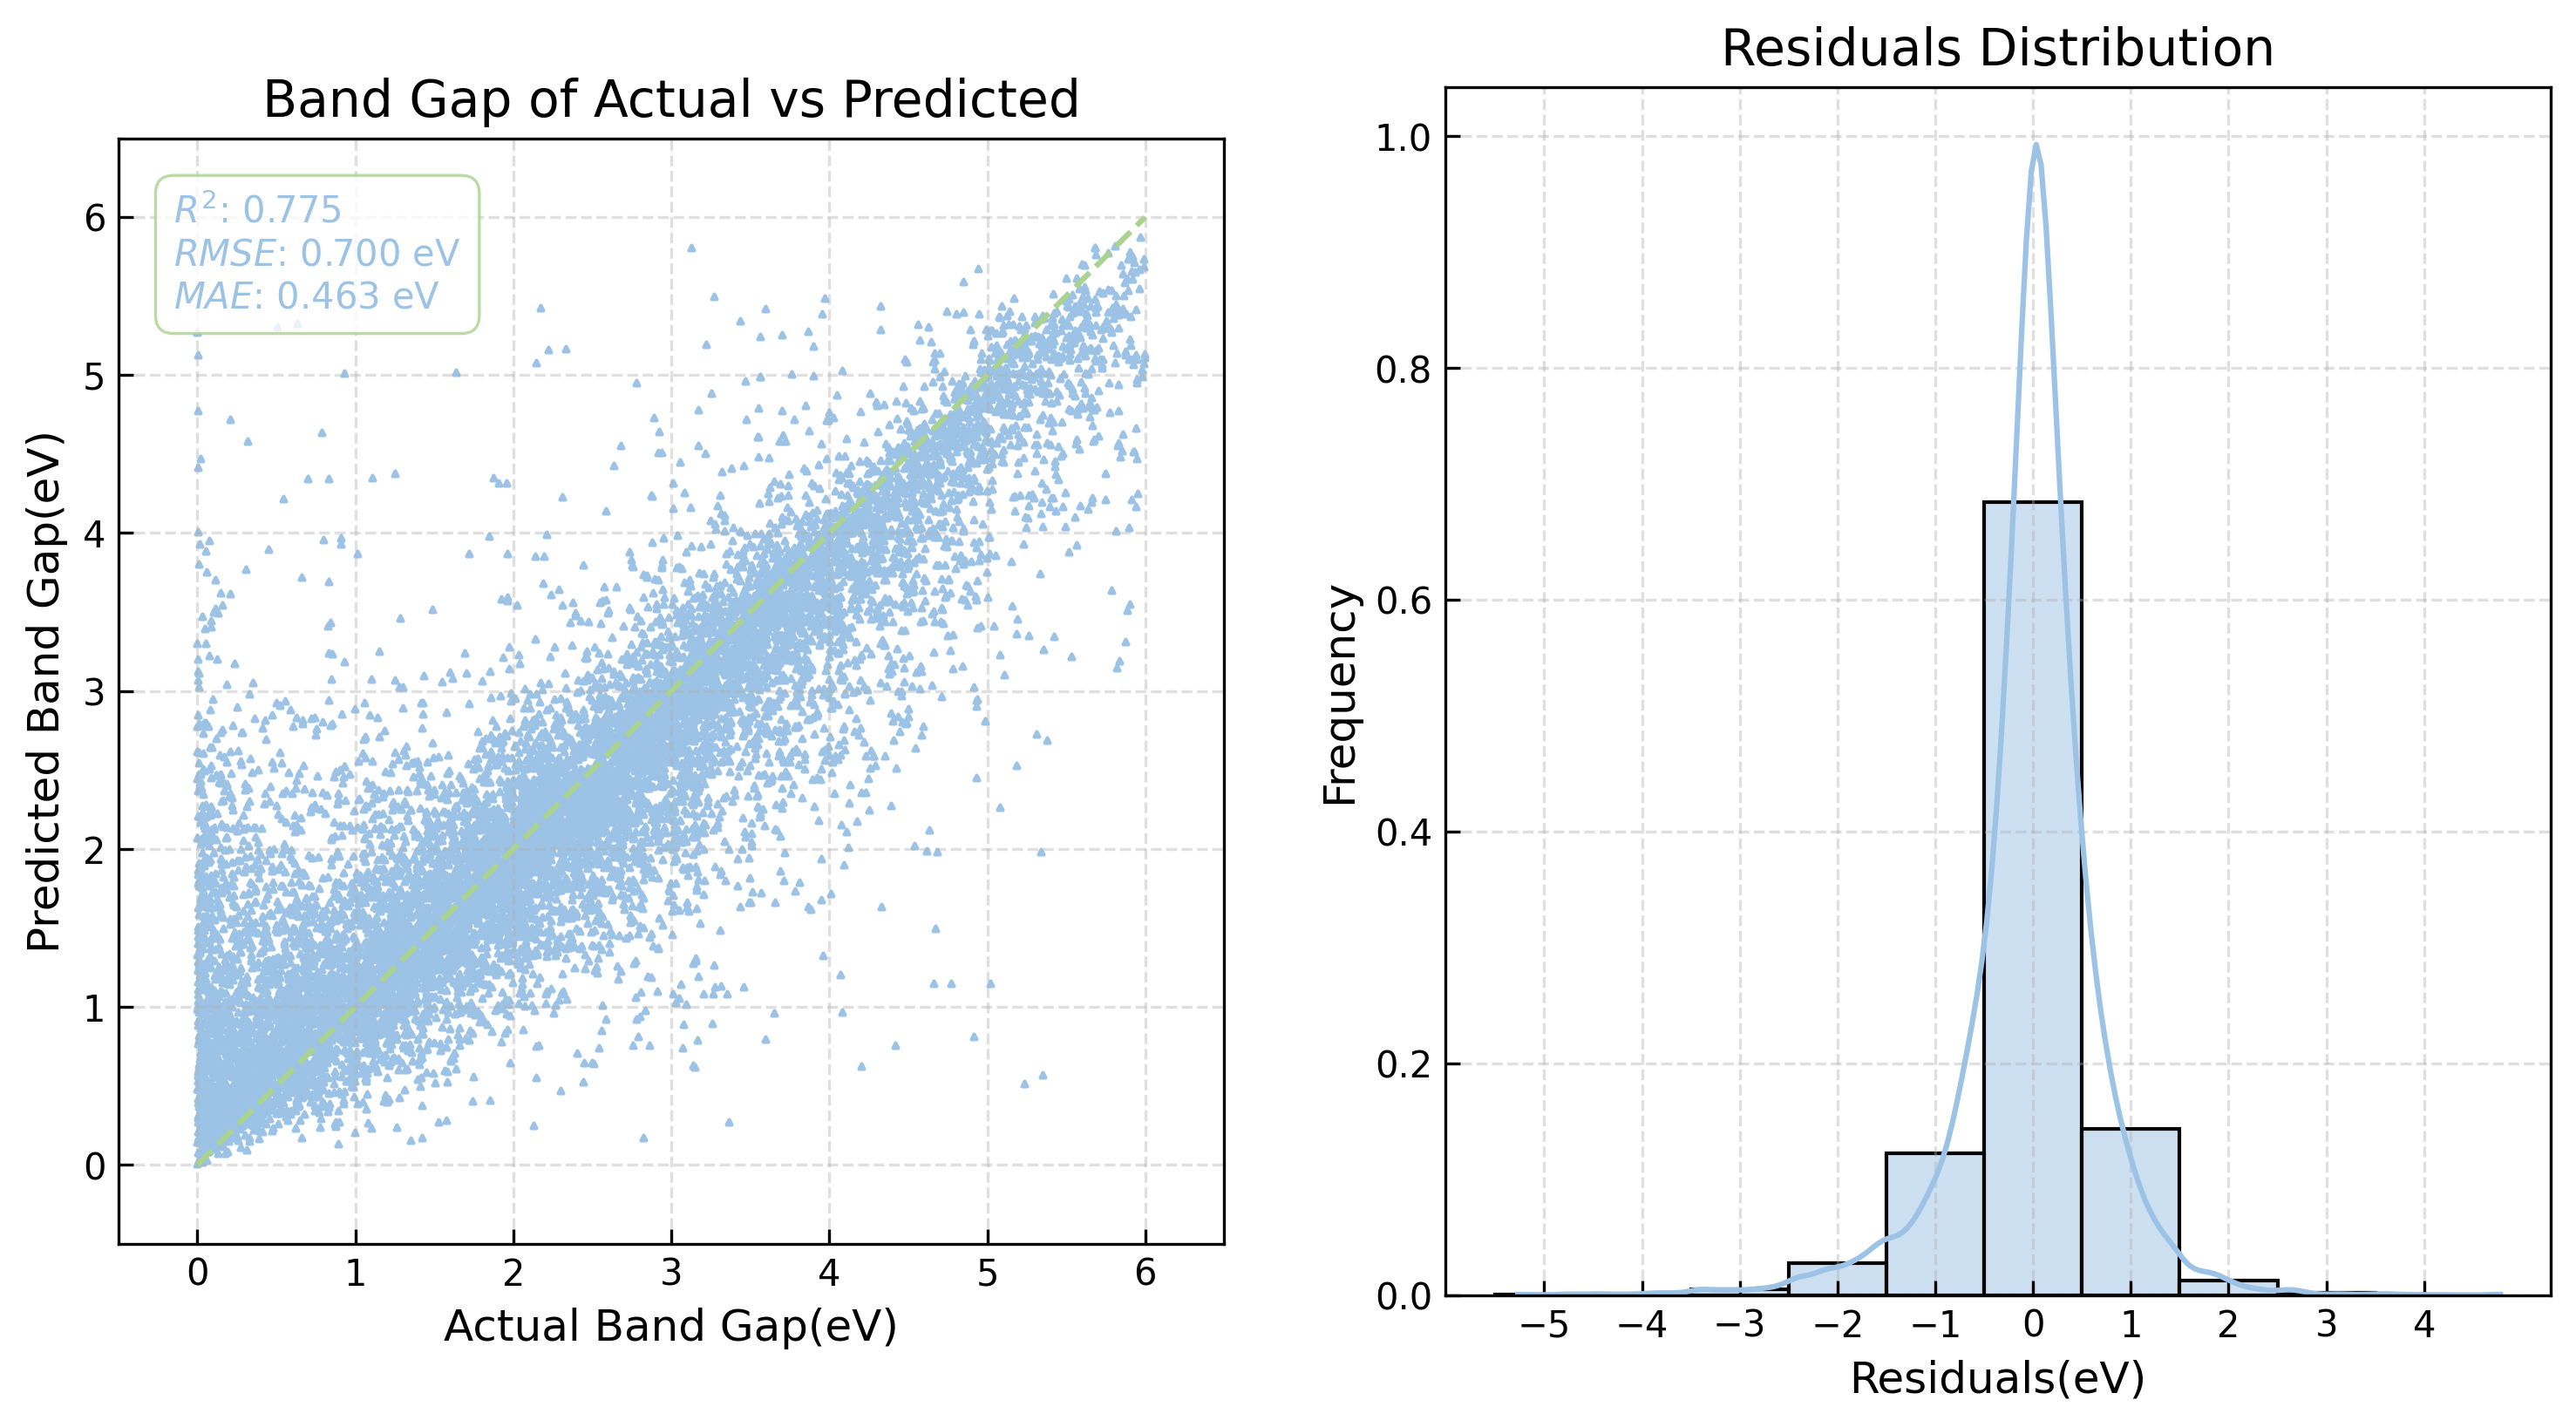


Model Evaluation Results:
Test set: R²: 0.7755 RMSE: 0.7004 MAE: 0.4627
[Test DFT -> EXP] Evaluating DFT RandomForest on EXP test set:


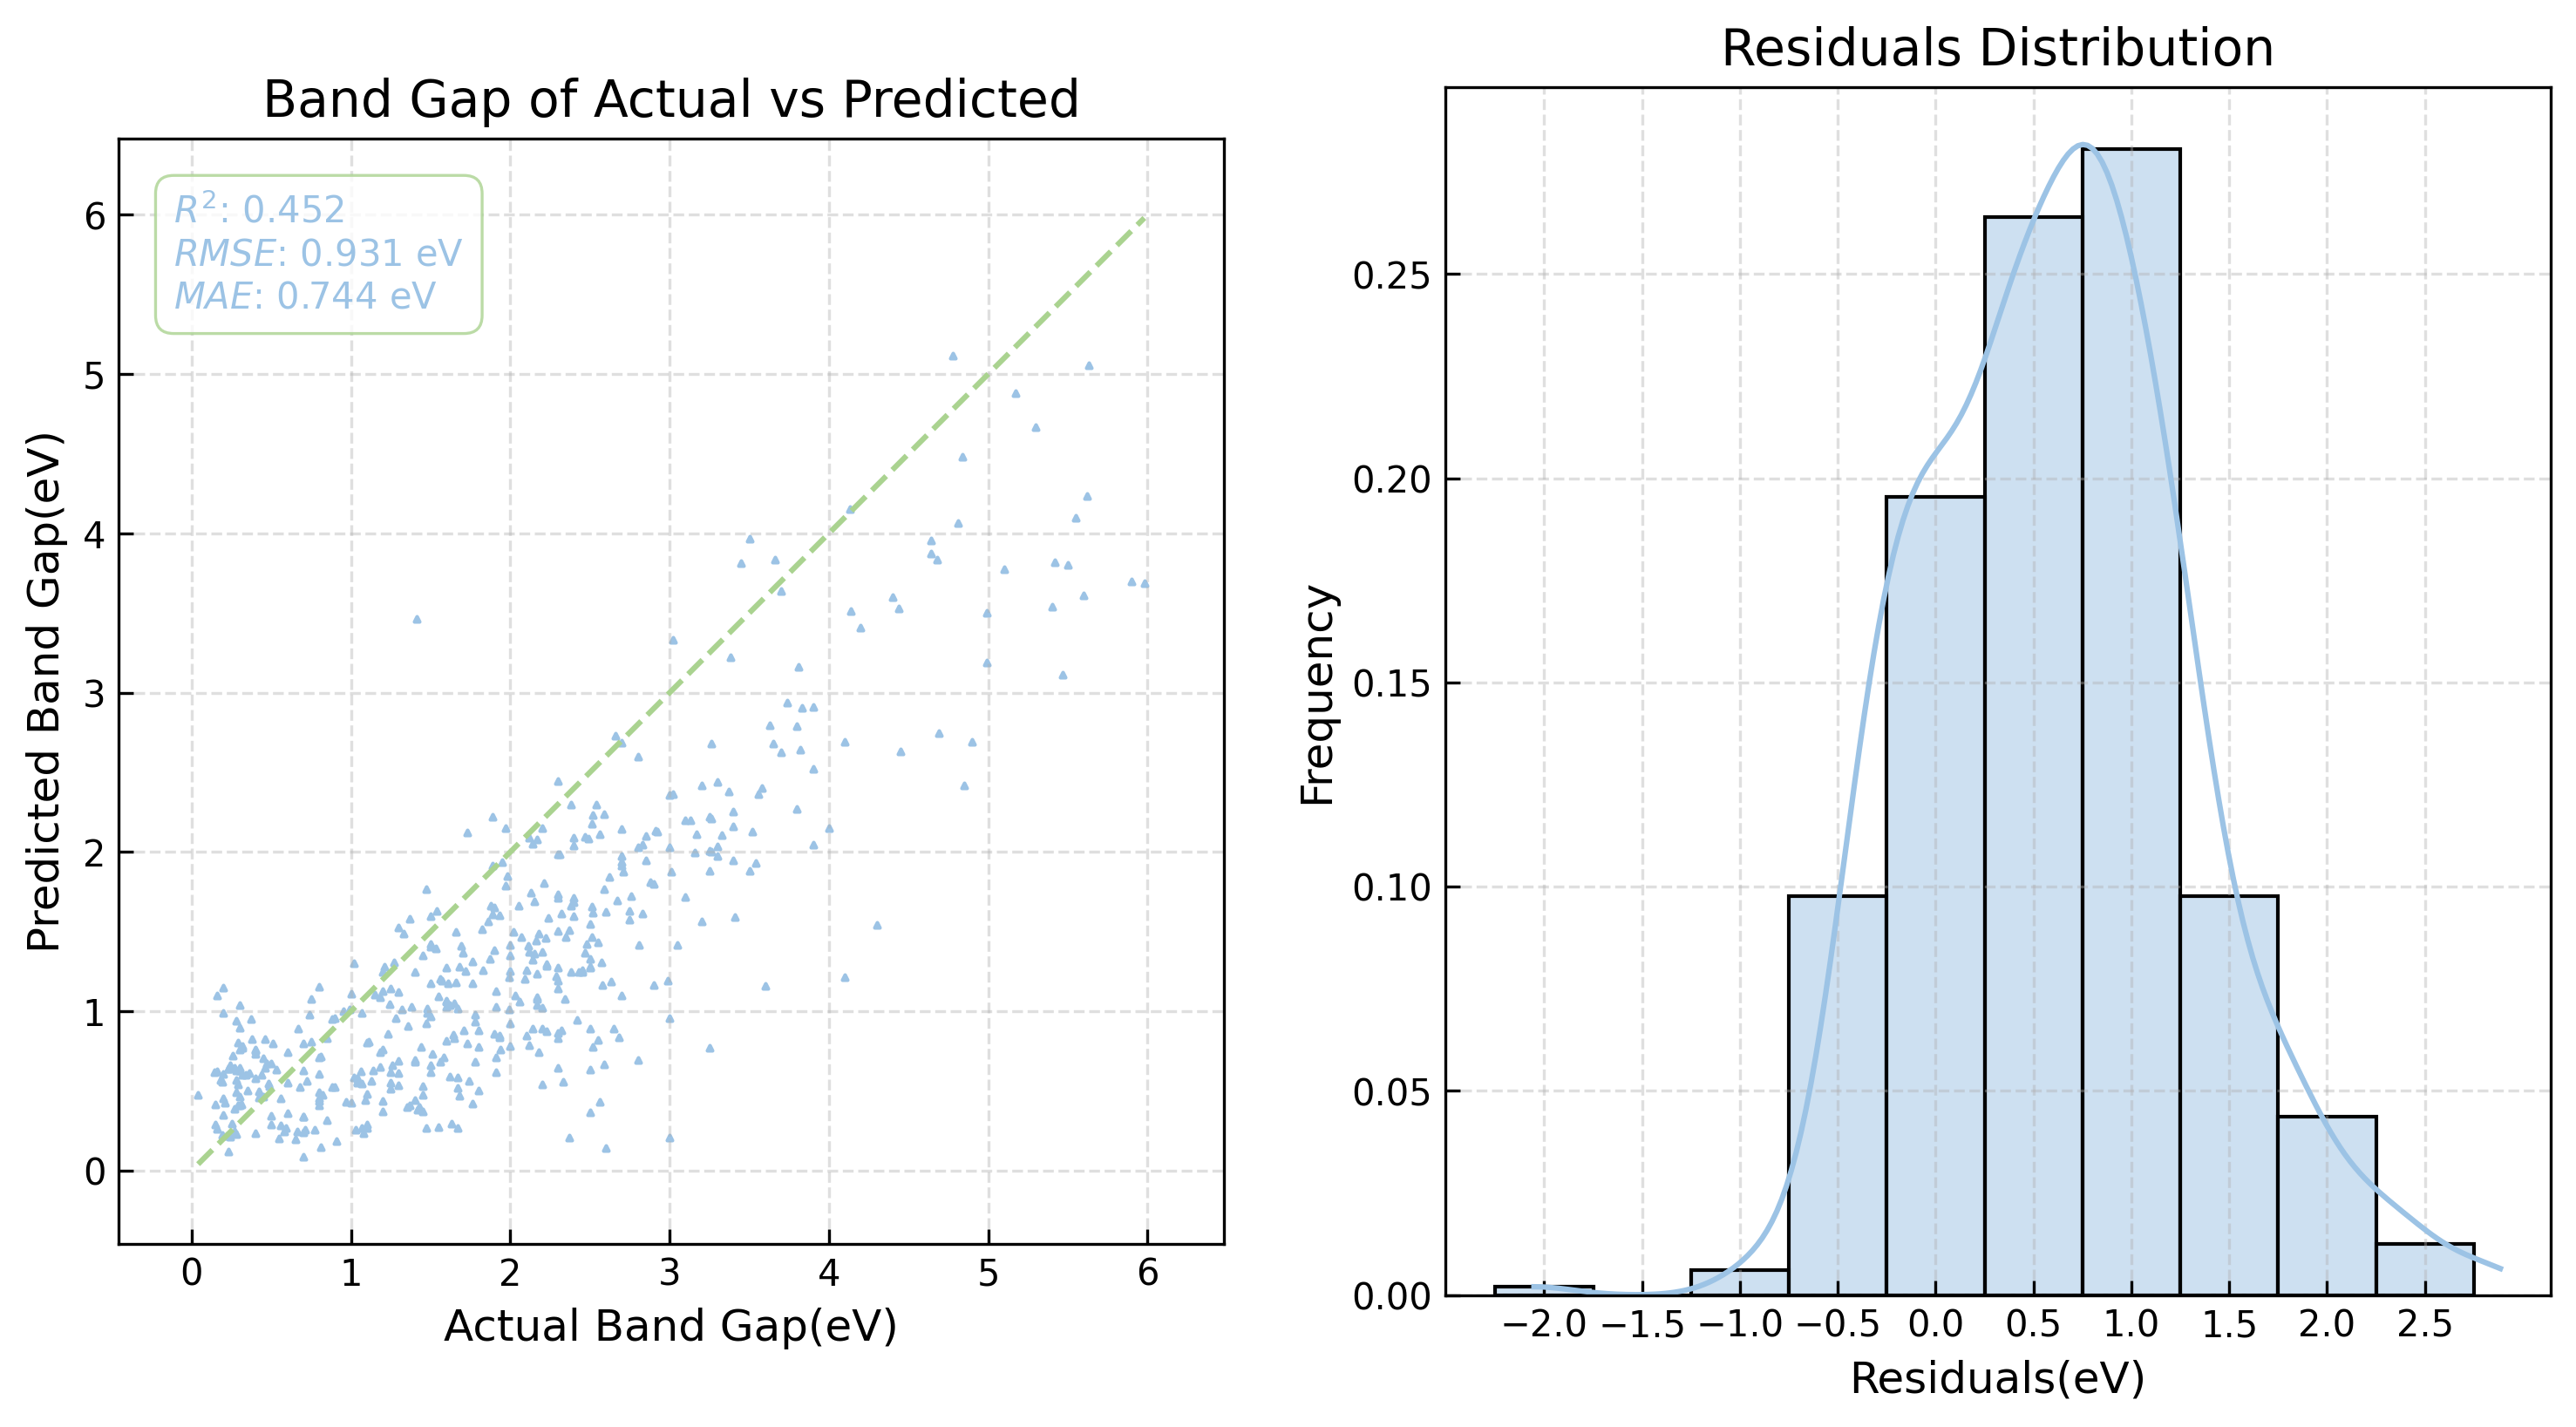


Model Evaluation Results:
Test set: R²: 0.4516 RMSE: 0.9307 MAE: 0.7438


In [21]:
# 
# Train the model with the best hyperparameters on the entire training set
# using the best hyperparameters from the random search
random_forest_best = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.25,
    random_state=RANDOM_SEED,
    n_jobs=-1
)
# record model metrics
model_metrics = pd.DataFrame(columns=['Model', 'Error_Type', 'Train_set', 'Test_set', 'R²', 'RMSE', 'MAE'])
# Train the model on dft data
print("#" * 100)
print(f"[DFT - {MODEL_NAME}] Training {MODEL_NAME} on DFT data:")
print("-" * 100)

dft_model = SingleModel(clone(random_forest_best), random_state=RANDOM_SEED)
dft_model.train(dft_train_X, dft_train_y)

# evaluate on the dft train set
print(f"[Train_error] Evaluating DFT {MODEL_NAME} on DFT train set:")
metrics = dft_model.evaluate(dft_train_X, dft_train_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Train',
'Train_set': 'dft',
'Test_set': 'dft',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}

# evaluate on the dft test set
print(f"[Test DFT -> DFT] Evaluating DFT {MODEL_NAME} on DFT test set:")

metrics = dft_model.evaluate(dft_test_X, dft_test_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Test',
'Train_set': 'dft',
'Test_set': 'dft',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}
# evaluate on the exp test set
print(f"[Test DFT -> EXP] Evaluating DFT {MODEL_NAME} on EXP test set:")
metrics = dft_model.evaluate(exp_test_X, exp_test_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Test',
'Train_set': 'dft',
'Test_set': 'exp',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}

In [23]:
model_metrics.head()

Model Error_Type Train_set Test_set        R²      RMSE       MAE
0  RandomForest      Train       dft      dft  0.954240  0.315876  0.202935
1  RandomForest       Test       dft      dft  0.775477  0.700395  0.462712
2  RandomForest       Test       dft      exp  0.451556  0.930660  0.743804

### EXP Model

In [24]:
# using grid search to find the best hyperparameters for the dft model
print(f"['EXP {MODEL_NAME}'] HP optimazation begin...")
# define the parameter grid for model
param_distributions = {
    'n_estimators': [300, 500],  # number of trees in the forest
    'max_depth': [None, 5, 10],  # maximum depth of the tree, None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 4, 6],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],    # minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.25, 0.5]  # number of features to consider when looking for the best split, None means all features
}

# create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
# create an model
random_forest = RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1)
# create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_distributions,
                n_iter=100, cv=kf, verbose=2, random_state=RANDOM_SEED, 
                scoring='neg_mean_squared_error', return_train_score=True,  n_jobs=-1)

# fit the model to the training data
random_search.fit(exp_train_X, exp_train_y)

['EXP RandomForest'] HP optimazation begin...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2', 0.25,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [300, 500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [25]:
# get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_score = np.sqrt(-random_search.best_score_)
print(f"Best Cross-Validation RMSE: {best_score:.4f}")

# create a DataFrame to store the results
results = pd.DataFrame(random_search.cv_results_)
results['test_rmse'] = np.sqrt(-results['mean_test_score'])
results['train_rmse'] = np.sqrt(-results['mean_train_score'])
# sort the results by test RMSE
results_sorted = results.sort_values('test_rmse')
results_sorted = results_sorted[['rank_test_score', 'param_n_estimators', 'param_max_depth', 
                                 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'train_rmse', 'test_rmse']]
# save the results to a csv file
results_sorted.to_csv(os.path.join(current_path, 'exp_random_search_results.csv'), index=False)
results_sorted.head()

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Best Cross-Validation RMSE: 0.5964


rank_test_score  param_n_estimators param_max_depth  \
24                1                 500            None   
62                2                 500            None   
19                3                 500            None   
46                4                 300            None   
61                5                 500            None   

    param_min_samples_split  param_min_samples_leaf param_max_features  \
24                        2                       1                0.5   
62                        2                       1               log2   
19                        4                       1                0.5   
46                        2                       1               log2   
61                        2                       2                0.5   

    train_rmse  test_rmse  
24    0.219048   0.596433  
62    0.220309   0.599588  
19    0.239341   0.599734  
46    0.220814   0.601051  
61    0.262665   0.602238

### Overfitting check

####################################################################################################
[EXP - RandomForest] Training RandomForest on EXP data:
----------------------------------------------------------------------------------------------------
Starting model training...
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.7s
Model training completed!
[Train_error] Evaluating EXP RandomForest on EXP train set:


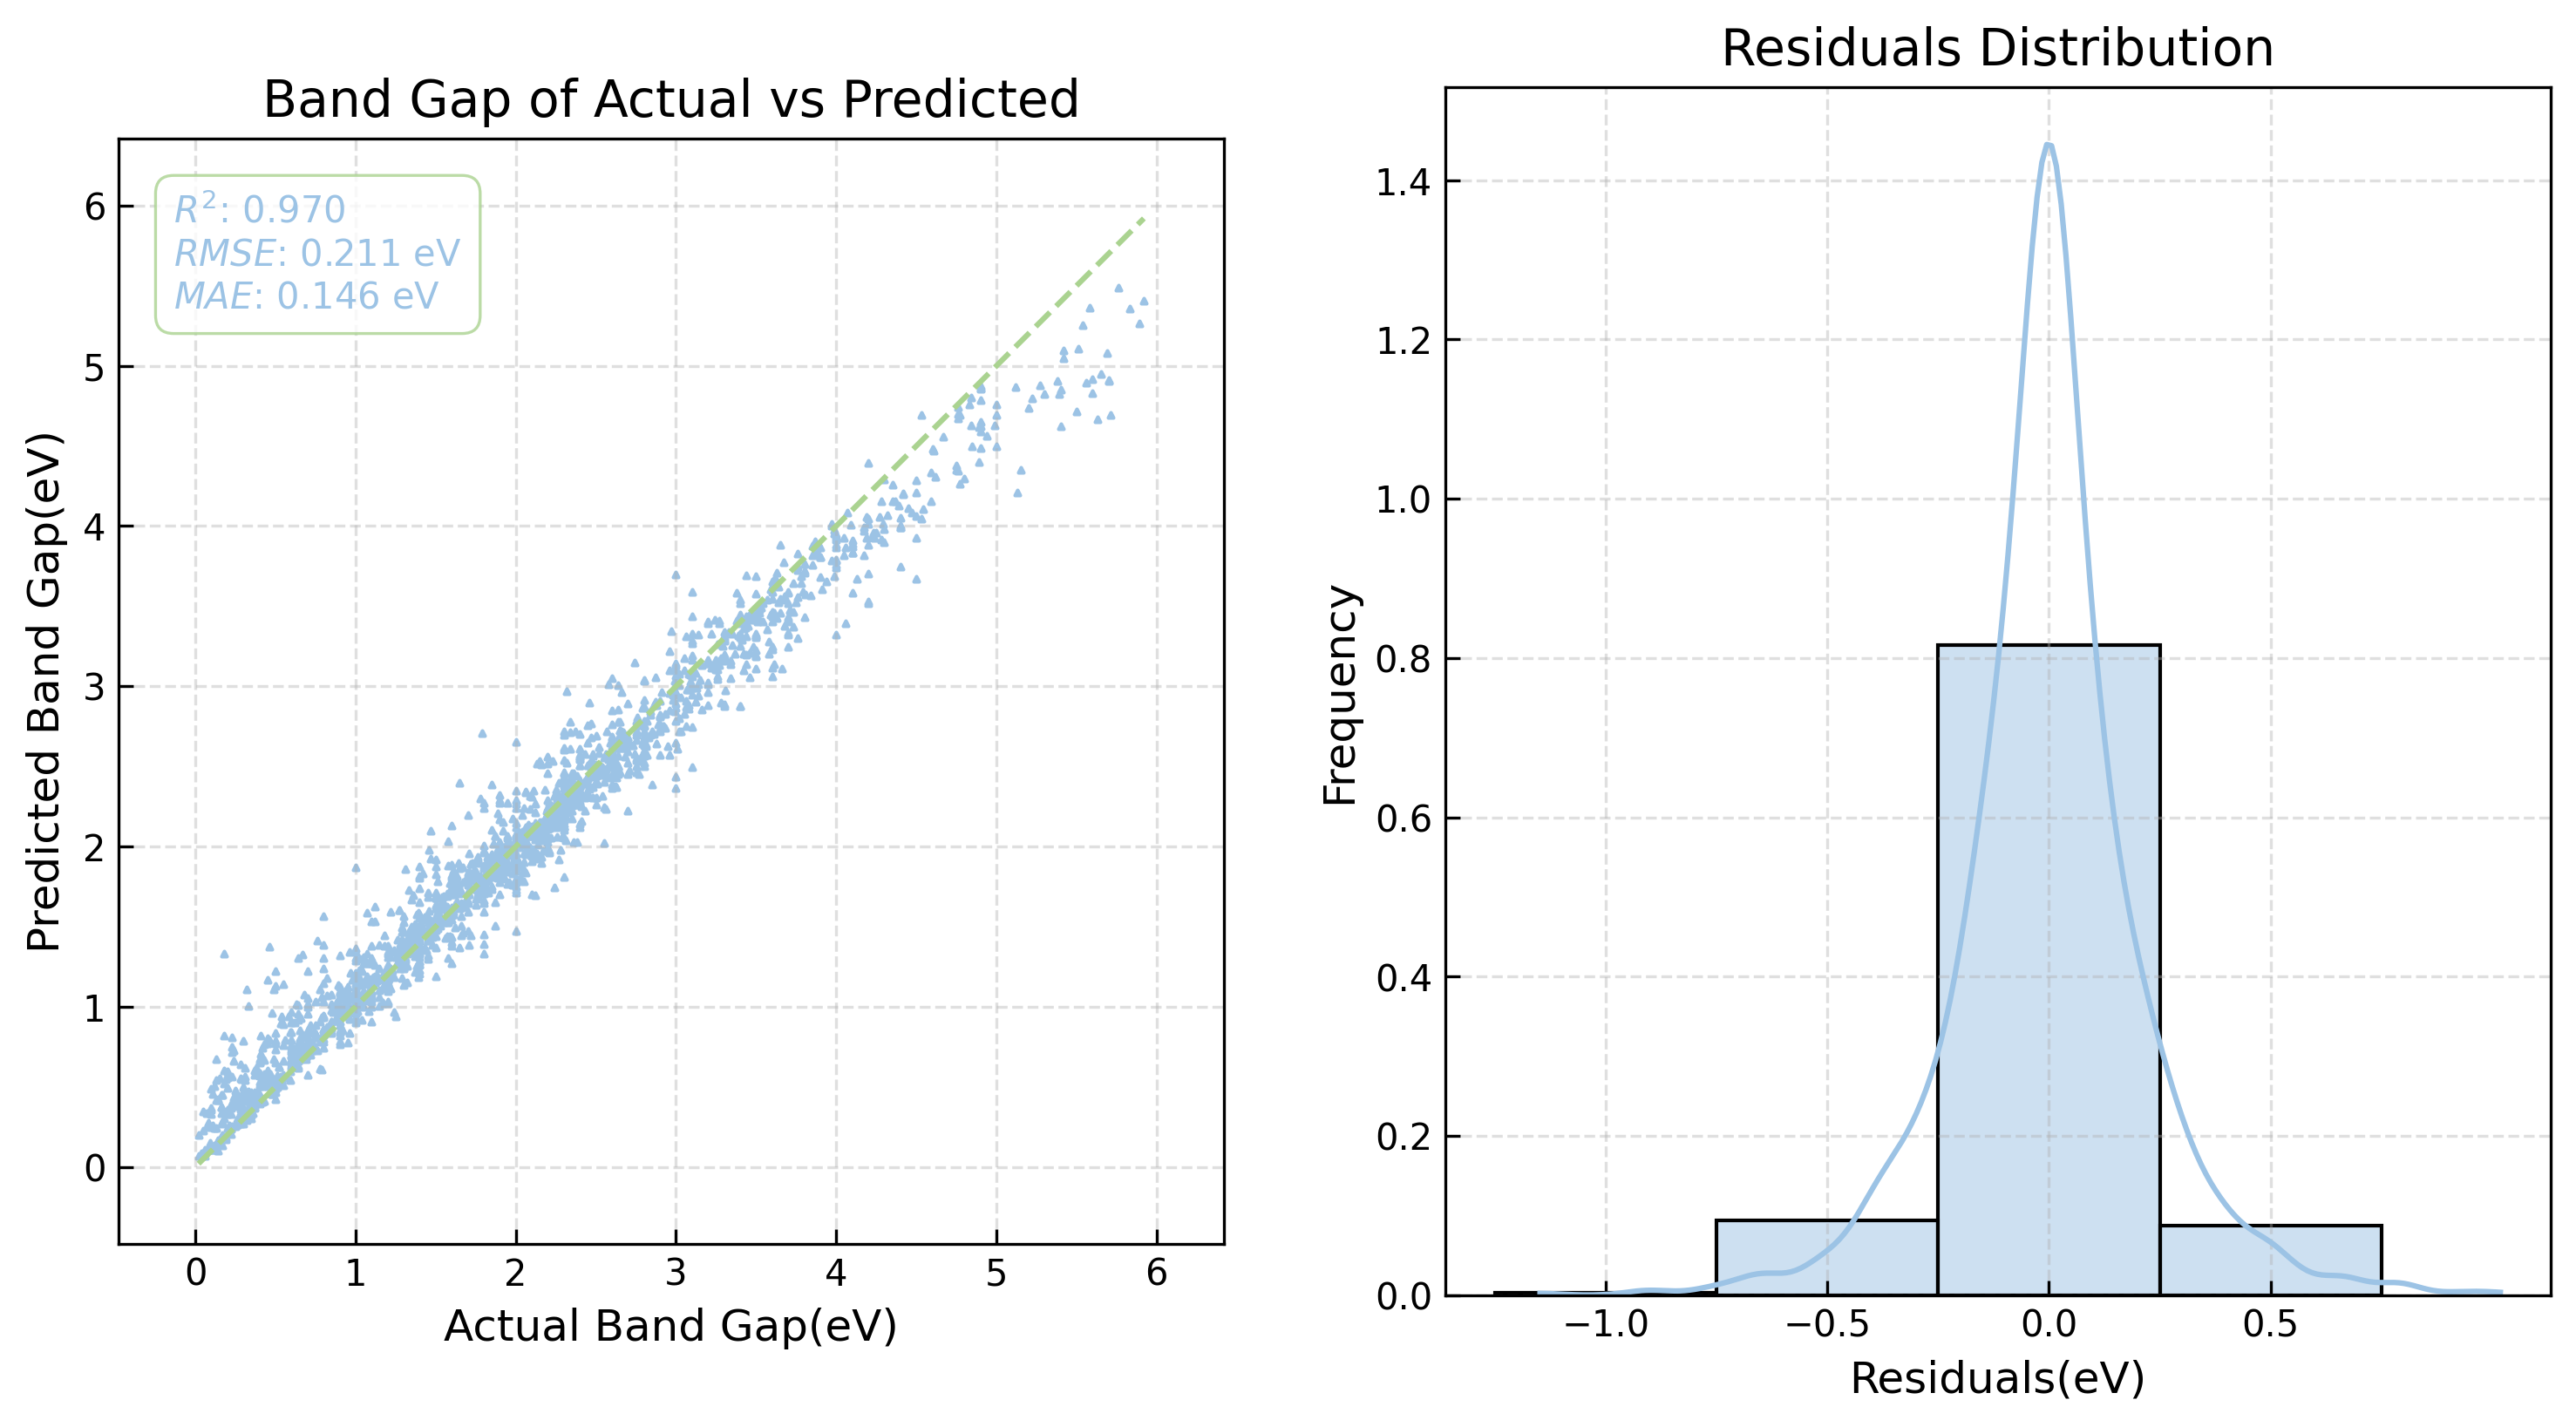


Model Evaluation Results:
Test set: R²: 0.9697 RMSE: 0.2114 MAE: 0.1462
[Test EXP -> EXP] Evaluating EXP RandomForest on EXP test set:


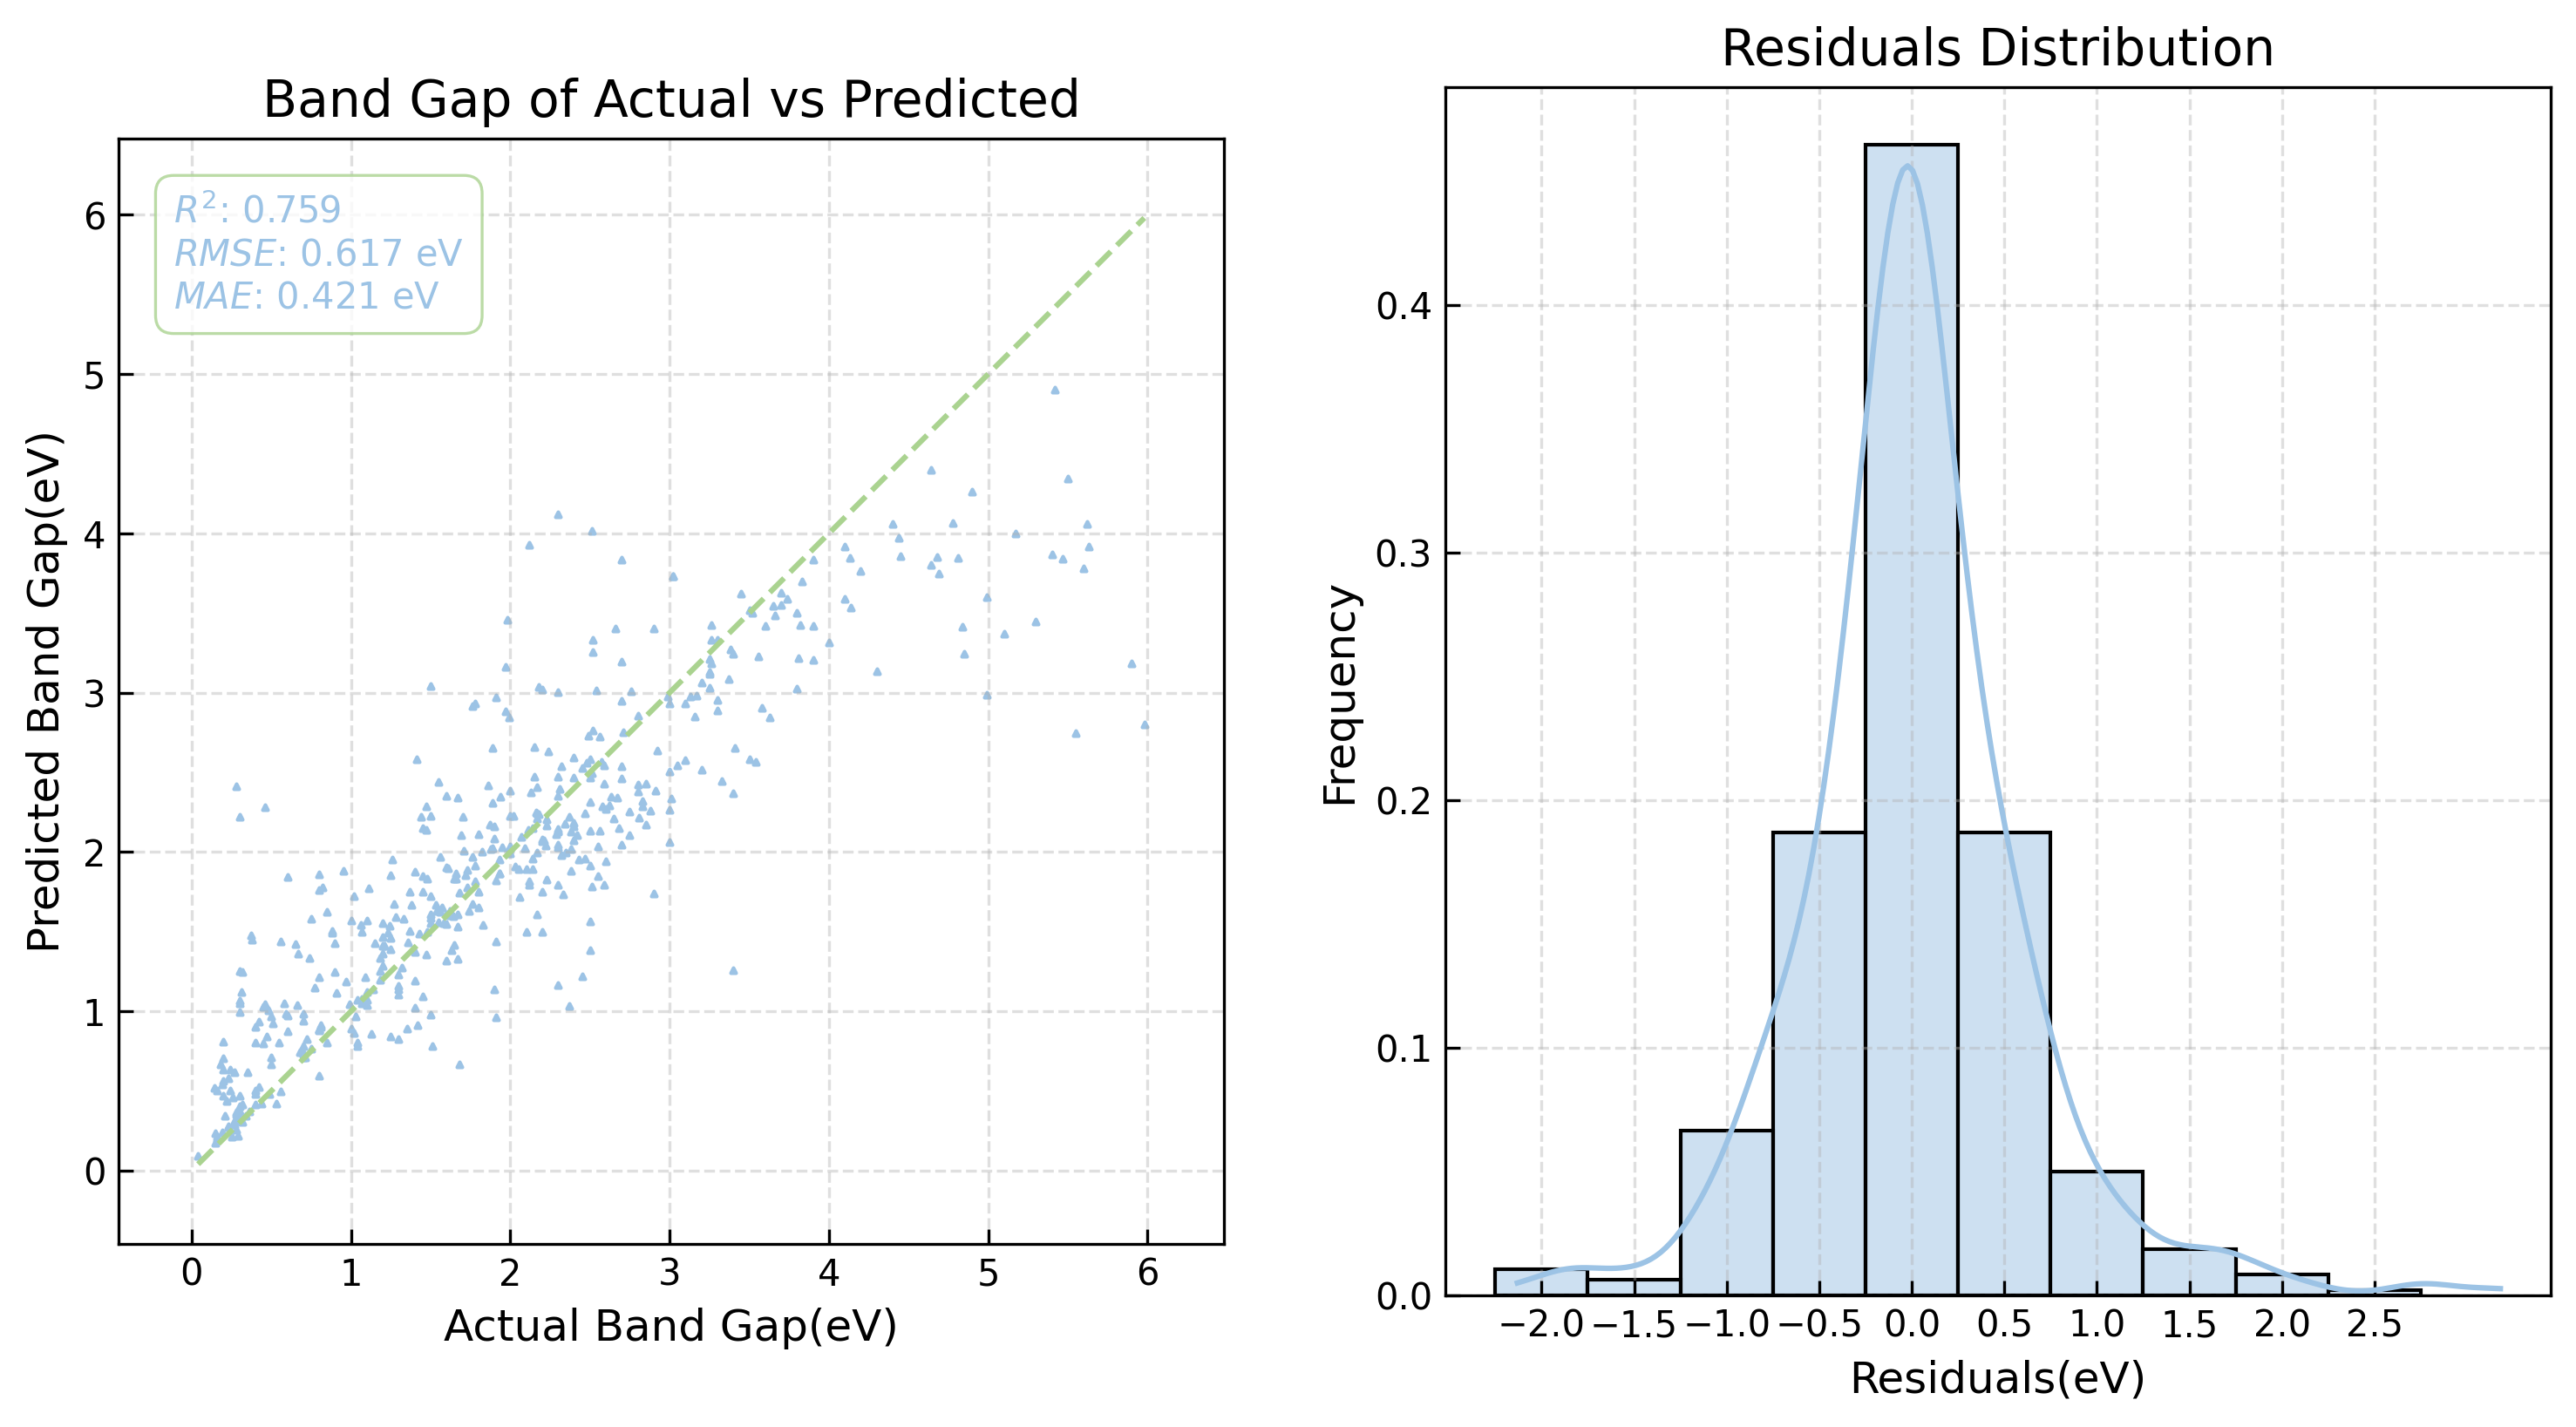


Model Evaluation Results:
Test set: R²: 0.7591 RMSE: 0.6168 MAE: 0.4212
[Test EXP -> DFT] Evaluating EXP RandomForest on DFT test set:


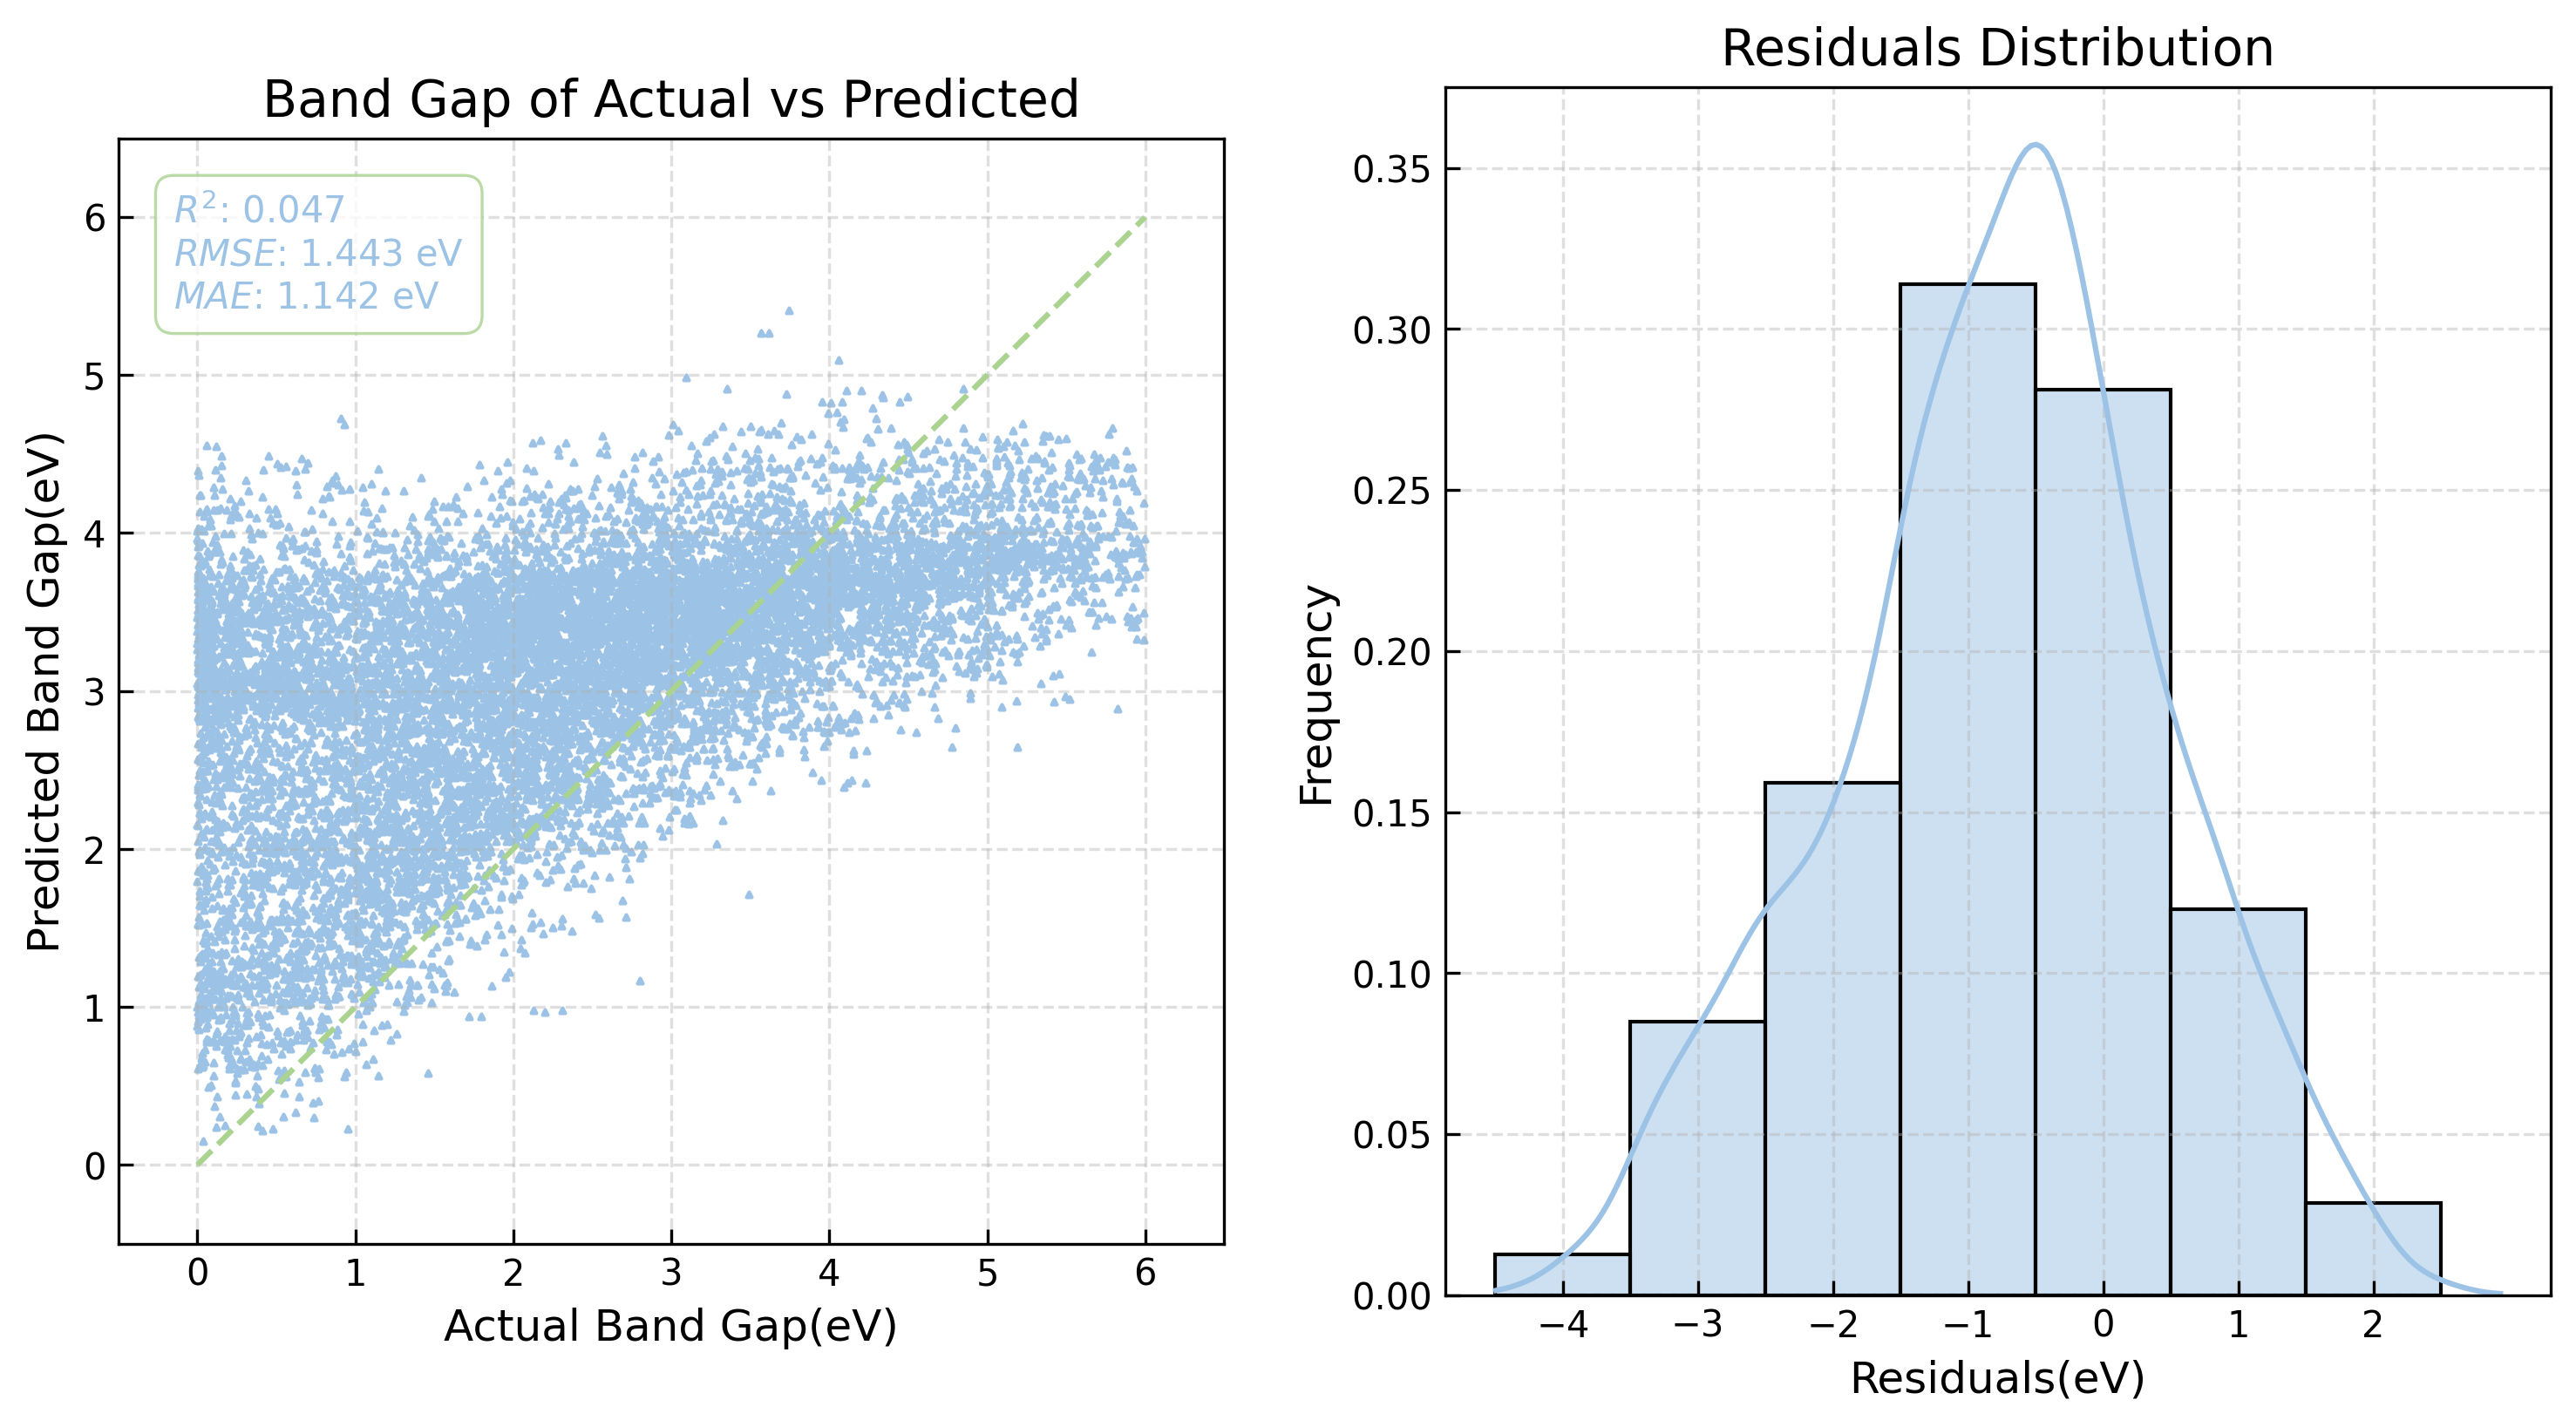


Model Evaluation Results:
Test set: R²: 0.0471 RMSE: 1.4429 MAE: 1.1420


In [30]:
# 
# Train the model with the best hyperparameters on the entire training set
# using the best hyperparameters from the random search
random_forest_best = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.5,
    random_state=RANDOM_SEED,
    n_jobs=-1
)
# record model metrics
model_metrics = pd.DataFrame(columns=['Model', 'Error_Type', 'Train_set', 'Test_set', 'R²', 'RMSE', 'MAE'])
# Train the model on dft data
print("#" * 100)
print(f"[EXP - {MODEL_NAME}] Training {MODEL_NAME} on EXP data:")
print("-" * 100)

exp_model = SingleModel(clone(random_forest_best), random_state=RANDOM_SEED)
exp_model.train(exp_train_X, exp_train_y)

# evaluate on the dft train set
print(f"[Train_error] Evaluating EXP {MODEL_NAME} on EXP train set:")
metrics = exp_model.evaluate(exp_train_X, exp_train_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Train',
'Train_set': 'exp',
'Test_set': 'exp',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}

# evaluate on the dft test set
print(f"[Test EXP -> EXP] Evaluating EXP {MODEL_NAME} on EXP test set:")

metrics = exp_model.evaluate(exp_test_X, exp_test_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Test',
'Train_set': 'exp',
'Test_set': 'exp',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}
# evaluate on the exp test set
print(f"[Test EXP -> DFT] Evaluating EXP {MODEL_NAME} on DFT test set:")
metrics = exp_model.evaluate(dft_test_X, dft_test_y)
model_metrics.loc[len(model_metrics)] = {
'Model': MODEL_NAME,
'Error_Type': 'Test',
'Train_set': 'exp',
'Test_set': 'dft',
'R²': metrics['r2'],
'RMSE': metrics['rmse'],
'MAE': metrics['mae']
}

In [31]:
model_metrics.head()

Model Error_Type Train_set Test_set        R²      RMSE       MAE
0  RandomForest      Train       exp      exp  0.969651  0.211374  0.146198
1  RandomForest       Test       exp      exp  0.759102  0.616797  0.421163
2  RandomForest       Test       exp      dft  0.047071  1.442922  1.142012